In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Loading the dataset
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Let's first only look at Annual Income and Spending Score
X = mall_df.iloc[:, [3, 4]].values

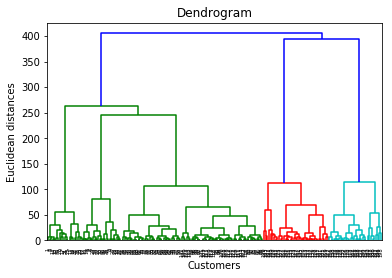

In [6]:
# Using dendogram to find optimal number of clusters in HC
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
# From above plot, optimum number of clusters = 5

In [8]:
# Creating HC model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

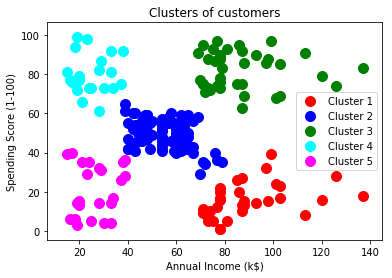

In [9]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [10]:
# Analysis: There are 5 types of spending habits:
# 1) Careful Customers - high income, low spending (Cluster 1)
# 2) Standard Customers - average income, average spending (Cluster 2)
# 3) Target Customers - high income, high spending (Cluster 3)
# 4) Careless Customers - low income, high spending (Cluster 4)
# 5) Sensible Customers - low income, low spending (Cluster 5)

In [17]:
# Converting Genre column to categorical integer column
mall_df['IsMale'] = mall_df['Genre'].apply(lambda X: int(X=='Male'))

In [18]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),IsMale
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [19]:
mall_df.drop('Genre', axis=1, inplace=True)

In [20]:
mall_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),IsMale
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [34]:
# Dropping Customer ID
X = mall_df.iloc[:, 1:].values

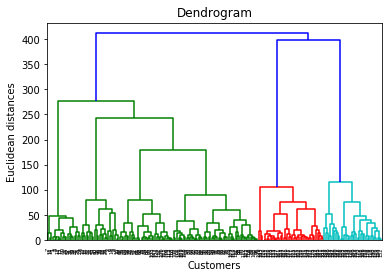

In [35]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [36]:
# Let's try with 3 clusters
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [39]:
X.shape

(200, 4)

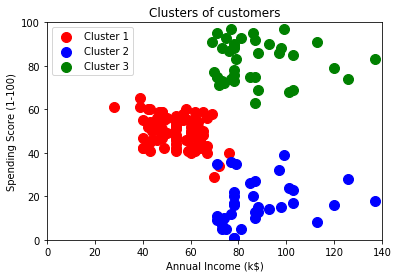

In [42]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 1], X[y_hc == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 1], X[y_hc == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 1], X[y_hc == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.xlim((0,140))
plt.ylim((0,100))
plt.legend()
plt.show()

In [41]:
mall_df.shape

(200, 5)